In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model, sklearn.datasets 
from sklearn import kernel_ridge 
print ("Ready")


Ready


In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))


In [ ]:
#Loading the Data

url = "/content/OPTION1_uk_road_accident_2019_coursework_final.csv" # Creating a path to the file

df = pd.read_csv (url, delimiter=",")

df.head() #Visualising

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# INSPECTING THE DATA

In [ ]:
# shape of dataset: 
print(df.shape)

# list of column titles 
print(df.columns)


(31647, 14)
Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


In [ ]:
# list of column (field) data types
print(df.dtypes)

accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Summary statistics for numerical features
df.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


In [ ]:
# let's list all categorical features
categorical_columns= ['light_conditions', 'weather_conditions', 
                      'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 
                      'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver', 'accident_severity'  ]

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


# DATA CLEANING

In [ ]:
# ACCIDENT SEVERITY 
df.loc[df.accident_severity=='Fatal','accident_severity'] = 'fatal'
df.loc[df.accident_severity=='Serious','accident_severity'] = 'serious'
df.loc[df.accident_severity=='Slight','accident_severity'] = 'slight'

# OTHER COLUMNS
df.loc[df.sex_of_driver=='data missing or out of range','sex_of_driver'] = np.nan
df.loc[df.first_point_of_impact=='data missing or out of range','first_point_of_impact'] = np.nan
df.loc[df.vehicle_leaving_carriageway=='data missing or out of range','vehicle_leaving_carriageway'] = np.nan
df.loc[df.hit_object_off_carriageway=='data missing or out of range','hit_object_off_carriageway'] = np.nan
df.loc[df.skidding_and_overturning=='data missing or out of range','skidding_and_overturning'] = np.nan
df.loc[df.junction_location=='data missing or out of range','junction_location'] = np.nan
df.loc[df.vehicle_type=='data missing or out of range','vehicle_type'] = np.nan
df.loc[df.road_surface_conditions=='data missing or out of range','road_surface_conditions'] = np.nan
df.loc[df.weather_conditions=='data missing or out of range','weather_conditions'] = np.nan



In [ ]:
df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,NaN,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# HANDLING MISSING DATA 

In [ ]:
df.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions              970
road_surface_conditions         365
vehicle_type                     63
junction_location              1470
skidding_and_overturning       2034
vehicle_leaving_carriageway    1967
hit_object_off_carriageway     1863
first_point_of_impact          1304
sex_of_driver                  5122
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

# SIMPLE IMPUTER FOR NUMERIC DATA

In [ ]:
# handling missing data
from sklearn.impute import SimpleImputer 

df_no_nan =  df.copy()

# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'median')  

# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['age_of_oldest_driver', 'speed_limit']
imptr_num = imptr_num.fit(df_no_nan[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df_no_nan[numerical_columns] = \
  imptr_num.transform(df_no_nan[numerical_columns]) # apply the transformation using the parameters estimated above

# note column ApplicantIncome in the first row --> before it was a missing value!
df_no_nan.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,NaN,47.0,serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.0,serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# SIMPLE IMPUTER FOR CATEGORICAL DATA

In [ ]:
# 1. Imputer
imptr_empl = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix
imptr_empl = imptr_empl.fit(df[['light_conditions', 'weather_conditions', 
                      'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 
                      'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver', 'accident_severity' ]])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df_no_nan[['light_conditions', 'weather_conditions', 
                      'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 
                      'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver', 'accident_severity']] = imptr_empl.transform(df[['light_conditions', 'weather_conditions', 
                      'road_surface_conditions', 'vehicle_type', 'junction_location', 'skidding_and_overturning', 
                      'vehicle_leaving_carriageway', 'first_point_of_impact', 'sex_of_driver', 'accident_severity']]) 


In [ ]:
df_no_nan.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,47.0,serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.0,serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# CHECKING FOR DUPLICATED ROW

In [ ]:
# Check for duplicated rows
duplicates = df_no_nan.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

# Print the number of duplicated rows
print("Number of duplicated rows: ", num_duplicates)

Number of duplicated rows:  1172


# REMOVING DUPLICATES

In [ ]:
print(f'Original dataset length: {len(df_no_nan)}')
duplicate_df = df_no_nan.drop_duplicates()
cleaned_df=duplicate_df
print(f'Dataset length after removing duplicate rows: {len(duplicate_df)}')
print()


Original dataset length: 31647
Dataset length after removing duplicate rows: 30475



In [ ]:
cleaned_df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,47.0,serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.0,serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


# CHECKING FOR CLASS DISTRIBUTION

In [ ]:
print("Class distribution:\n", cleaned_df['accident_severity'].value_counts())

Class distribution:
 slight     13362
serious    11180
fatal       5933
Name: accident_severity, dtype: int64


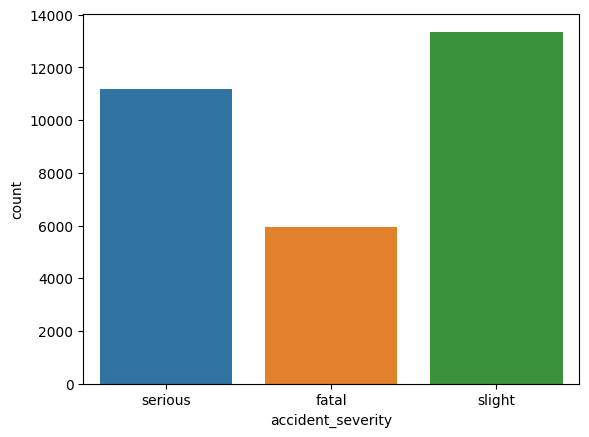

In [ ]:
# Visualize class distribution
sns.countplot(x='accident_severity', data=cleaned_df)
plt.show()

# ENCODING THE CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEncoder_X= LabelEncoder()

In [ ]:
import warnings
warnings.simplefilter("ignore")
from sklearn import preprocessing
d= preprocessing.LabelEncoder()
for i in range (0,df.shape[1]):
    if cleaned_df.dtypes[i]=='object':
        cleaned_df[cleaned_df.columns[i]]=d.fit_transform(cleaned_df[cleaned_df.columns[i]])
        
cleaned_df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,5821,30.0,0,2,3,1,0,1,1,1,2,1,63.0,1
1,13489,30.0,0,0,0,3,0,1,0,0,0,1,82.0,0
2,6742,40.0,1,0,0,3,0,1,1,1,0,1,47.0,1
3,22587,40.0,1,0,0,3,1,1,1,1,0,2,47.0,1
4,7339,30.0,1,0,0,3,1,1,1,1,0,0,39.0,2


# SEPARATING THE FEATURE AND TARGET VARIABLES

In [ ]:
X = cleaned_df.drop(['accident_severity', 'accident_index'], axis=1)
y = cleaned_df['accident_severity']

# PERFORMING OVERSAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# VIEWING THE TARGET AFTER OVERSAMPLING

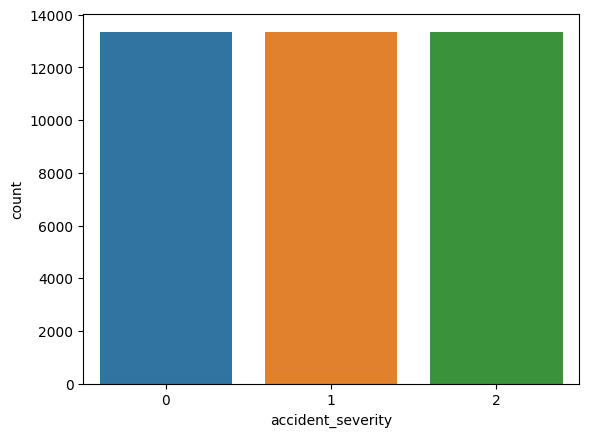

In [ ]:
sns.countplot(x=y, data=cleaned_df)
plt.show()

# SCALING THE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print (X)

[[-5.64869342e-01 -1.29493685e+00  2.26263236e+00 ...  2.06811667e+00
  -1.06502248e-01  1.05454865e+00]
 [-5.64869342e-01 -1.29493685e+00 -4.48914323e-01 ... -5.18061420e-01
  -1.06502248e-01  2.30769951e+00]
 [ 9.81051015e-02  7.72238432e-01 -4.48914323e-01 ... -5.18061420e-01
  -1.06502248e-01 -7.36291925e-04]
 ...
 [-1.22784378e+00  7.72238432e-01 -4.48914323e-01 ... -5.18061420e-01
  -1.06502248e-01 -6.06848523e-01]
 [-1.22784378e+00  7.72238432e-01 -4.48914323e-01 ... -5.18061420e-01
  -1.06502248e-01  6.52190167e-02]
 [-5.64869342e-01 -1.29493685e+00  2.26263236e+00 ... -5.18061420e-01
   1.65692159e+00 -6.66916006e-02]]


# TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PRINCIPLE COMPONENT ANALYSIS

# HEATMAP

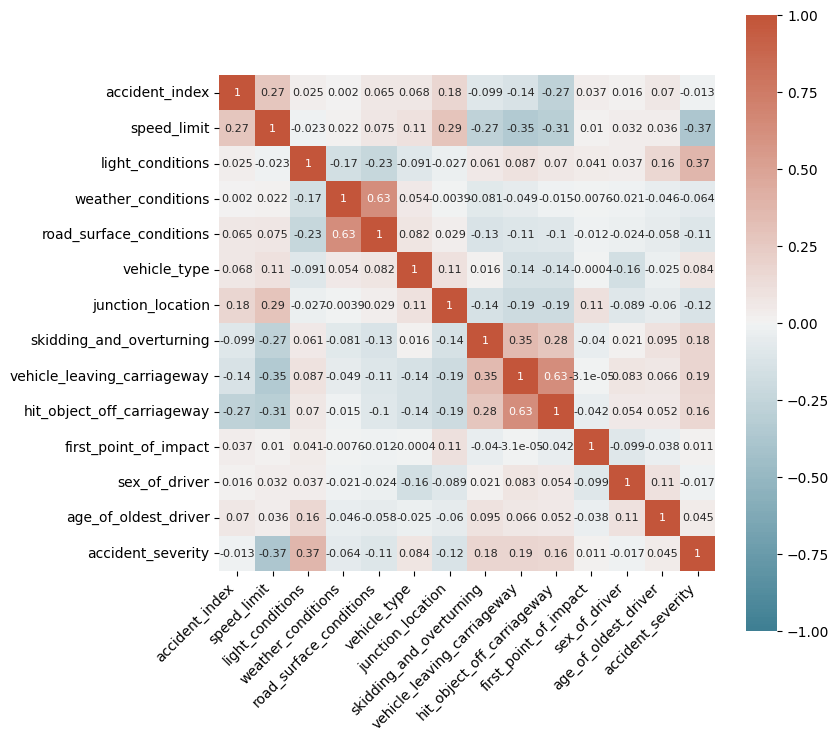

In [ ]:
plt.figure(figsize=(8, 8))
corr = cleaned_df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# BOXPLOT

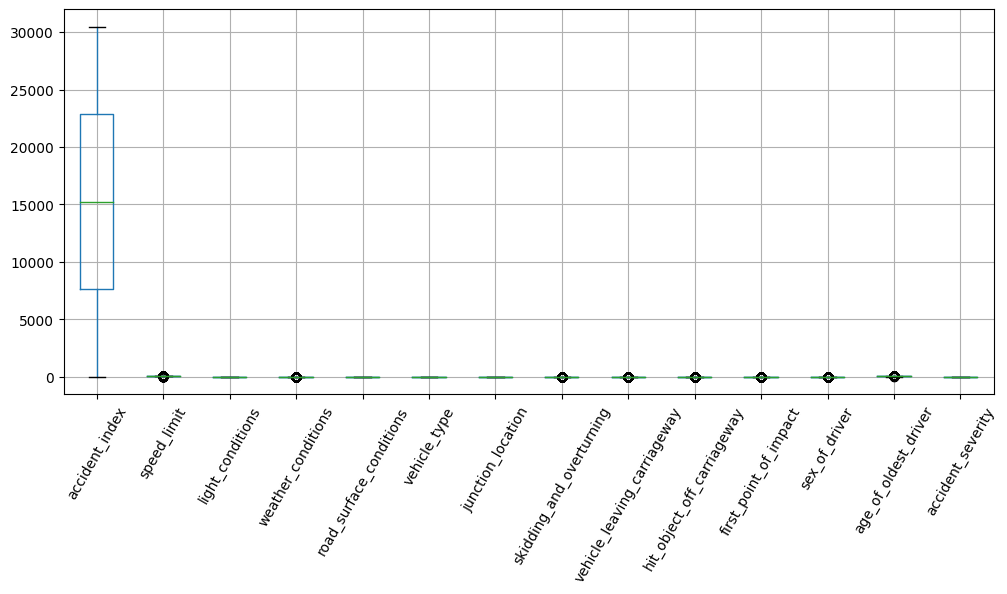

In [ ]:
# how about we show the distribution of the input features using box plots?
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,5)) # we set a large enough figuresize to make sure we can confortably see what's going on.
cleaned_df.boxplot() #we can show a boxplot of all pandas columns at once
_=plt.xticks(rotation=60) #we can rotate the labels on the x axis for ease of visualisation


# LINE CHART

Text(0, 0.5, 'Total variance fraction explained')

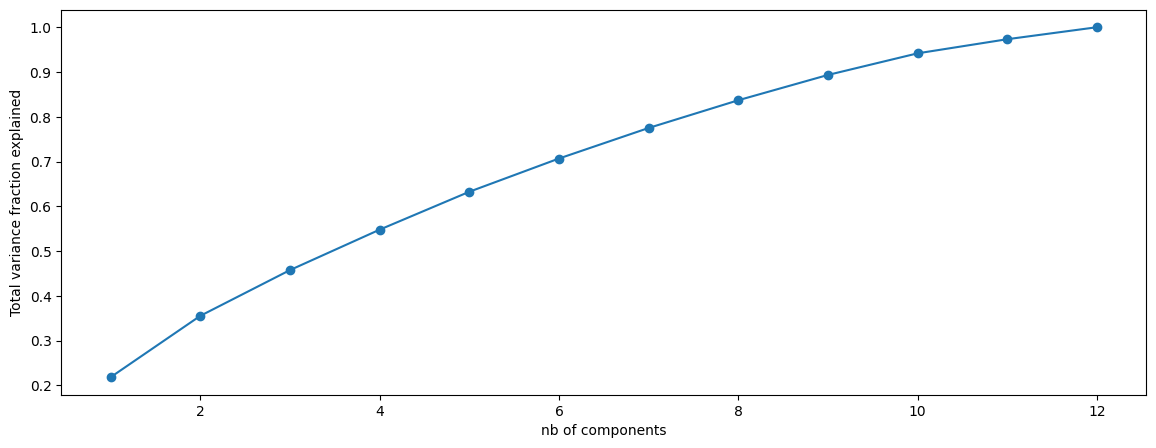

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_transform = pca.fit_transform(X)
plt.figure(figsize=(14,5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('nb of components')
plt.ylabel('Total variance fraction explained')


# SCATTER PLOT

In [ ]:
# let's do PCA with two components
pca_viz = PCA(n_components=2)
pca_viz_transform = pca_viz.fit_transform(X_train)

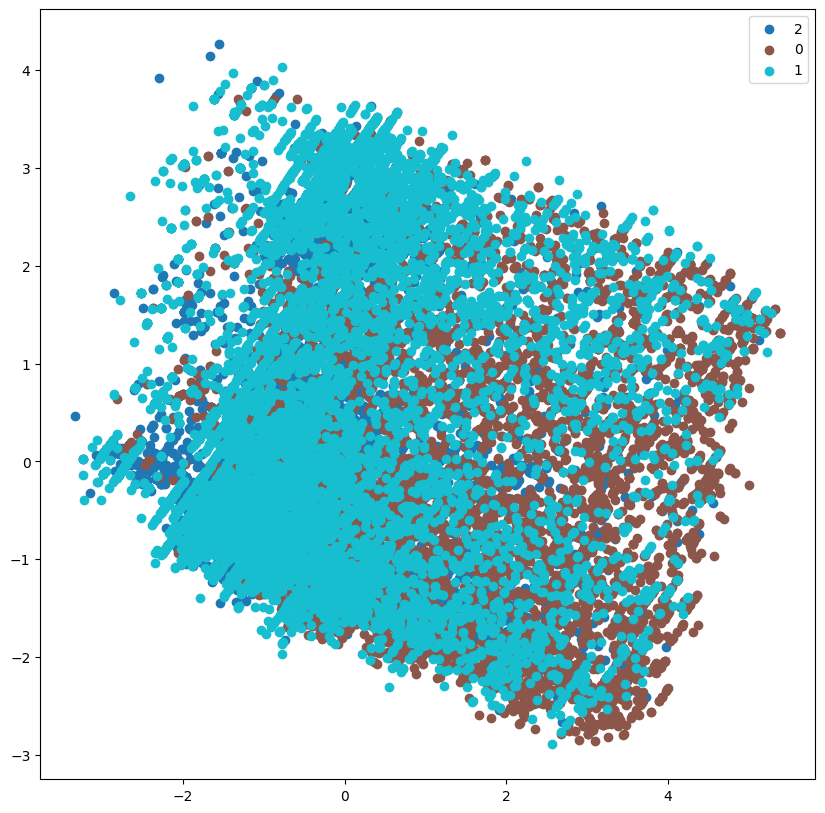

In [ ]:
# Let's plot the results
# first, let's get all possible classes - we'll plot them in different colors
classes_ = y_train.value_counts().index

# let's get 3 different colors to recognize the different classes
from matplotlib import cm 
colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))

plt.figure(figsize=(10,10))
for target_class,color in zip(classes_, colors):
    # let's only plot the transformed data points for a given label
    plt.scatter(pca_viz_transform[y_train==target_class,0],
                pca_viz_transform[y_train==target_class,1],
                label=target_class,
                color=color)
plt.legend()

# CLASSIFICATION

# CREATING A FUNCTION TO EVALUATE THE MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculating the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    print("Classification Report:\n", classification_report(y_test, y_pred))

 

    # Create confusion matrix and display it as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# TRIVAL BASELINE

Accuracy: 0.3214018458468446
Precision: 0.10329914651375886
Recall: 0.3214018458468446
F1 Score: 0.15634781628075858
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2712
           1       0.00      0.00      0.00      2729
           2       0.32      1.00      0.49      2577

    accuracy                           0.32      8018
   macro avg       0.11      0.33      0.16      8018
weighted avg       0.10      0.32      0.16      8018



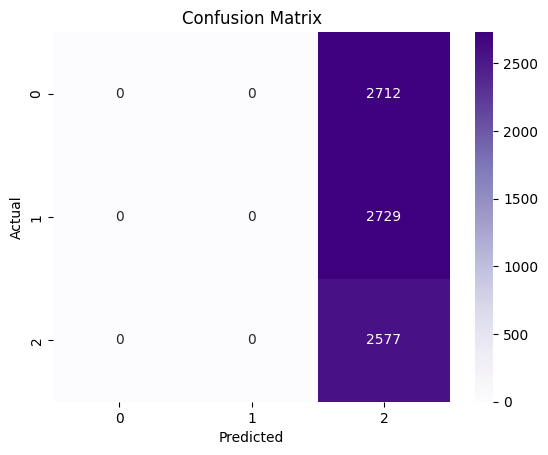

In [ ]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy= "prior")

baseline.fit(X_train, y_train)

pred = baseline.predict(X_test)

evaluate_model_performance(baseline, X_test, y_test)

# SGDCLASSIFIER

In [ ]:
import warnings
from sklearn.linear_model import SGDClassifier

warnings.simplefilter("ignore")

param_grid = {
    "loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "max_iter": [1000],
    "tol": [1e-3],
}

sgd = SGDClassifier(random_state=42)

grid = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)




Best estimator: SGDClassifier(alpha=0.01, loss='log', random_state=42)
Best params: {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Best Score: 0.7403331685736576


Stochastic Gradient Descent Results:
Accuracy: 0.7484410077326017
Precision: 0.7496698161527717
Recall: 0.7484410077326017
F1 Score: 0.7480123329865748
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      2712
           1       0.73      0.73      0.73      2729
           2       0.78      0.71      0.74      2577

    accuracy                           0.75      8018
   macro avg       0.75      0.75      0.75      8018
weighted avg       0.75      0.75      0.75      8018



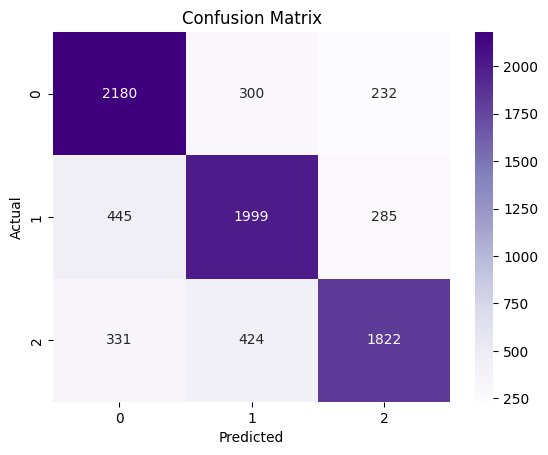

In [ ]:
sgd = grid.best_estimator_
sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Results:")
sgd_results = evaluate_model_performance(sgd, X_test, y_test)

# LOGISTIC REGRESSION

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

warnings.simplefilter("ignore")

param_grid = {
    'C': np.logspace(-4, 4, 20),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'max_iter': [20000],
    'class_weight': ['balanced']
}

lr = LogisticRegression()

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}'.format(
    grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_, grid.best_params_))


Best estimator: LogisticRegression(C=0.012742749857031334, class_weight='balanced',
                   max_iter=20000, solver='liblinear')
Weights: [[ 1.0473473  -1.03708579 -0.49925299 -0.09994045  0.56087341 -0.06069008
  -0.11459543 -0.08909942 -0.05488911 -0.00637963 -0.09763122  0.07203245]
 [-0.24304914 -0.08678258  0.5393926   0.0922393  -1.15919673 -0.04142066
  -0.06178397  0.05558613 -0.06924733 -0.05016906  0.01669648 -0.01539991]
 [-0.90748278  1.16273571 -0.21831794  0.00817127  0.91531084  0.07969386
   0.22236619  0.0584952   0.11682543  0.06212372  0.08448195 -0.03257605]], Intercept: [-1.02264259 -0.89768656 -1.07992557]
Best params: {'C': 0.012742749857031334, 'class_weight': 'balanced', 'max_iter': 20000, 'solver': 'liblinear'}


Logistic Regression Results:
Accuracy: 0.7473185333000748
Precision: 0.748642857319571
Recall: 0.7473185333000748
F1 Score: 0.7469199994270164
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      2712
           1       0.73      0.74      0.73      2729
           2       0.78      0.70      0.74      2577

    accuracy                           0.75      8018
   macro avg       0.75      0.75      0.75      8018
weighted avg       0.75      0.75      0.75      8018



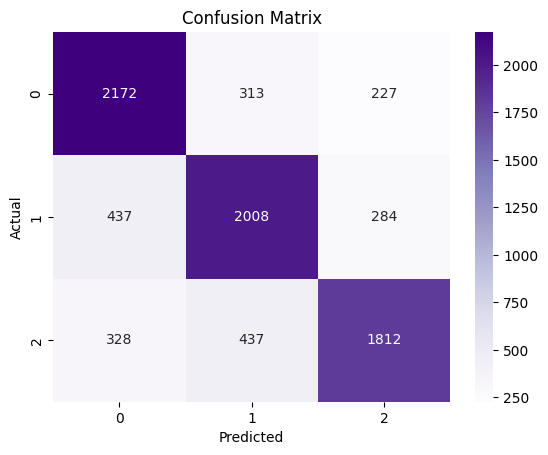

In [ ]:
log_reg = grid.best_estimator_
print("Logistic Regression Results:")
# Evaluate the model using the evaluate_model_performance function
log_reg_results = evaluate_model_performance(log_reg, X_test, y_test)


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [10, 50, 100, 200],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(n_estimators=100)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)

# get feature importance of the best estimator
feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)

Best estimator: RandomForestClassifier(criterion='entropy')
Best params: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Feature importance: [0.15656436 0.11754162 0.03869767 0.02516314 0.23927105 0.02179541
 0.02071969 0.01875294 0.02068461 0.02663403 0.03323684 0.28093866]


Random Forest Results:
Accuracy: 0.7703916188575705
Precision: 0.7696651329831287
Recall: 0.7703916188575705
F1 Score: 0.7686016161868786
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      2712
           1       0.76      0.73      0.74      2729
           2       0.77      0.71      0.74      2577

    accuracy                           0.77      8018
   macro avg       0.77      0.77      0.77      8018
weighted avg       0.77      0.77      0.77      8018



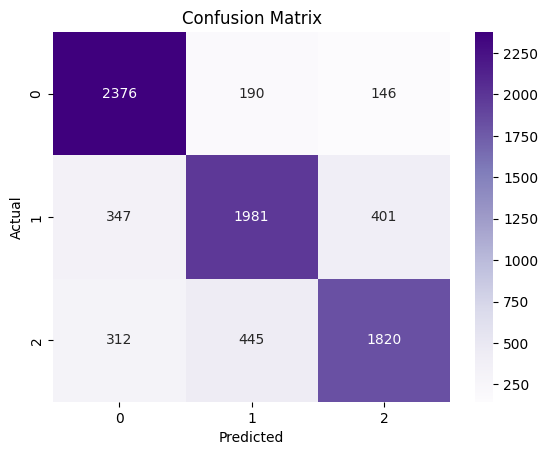

In [ ]:
# Random Forest
rf = grid.best_estimator_
rf.fit(X_train, y_train)
print("Random Forest Results:")
rf_results = evaluate_model_performance(rf, X_test, y_test)

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["auto","sqrt", "log2"], 
    "splitter":["best", "random"]
}

rf = DecisionTreeClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)

# get feature importance of the best estimator
feature_importance = grid.best_estimator_.feature_importances_
print('Feature importance:', feature_importance)

Best estimator: DecisionTreeClassifier(max_features='auto')
Best params: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
Best Score: 0.7396468579629596
Feature importance: [0.19292432 0.13084966 0.03954904 0.01890853 0.25734597 0.01439278
 0.01303366 0.01521916 0.01380007 0.02427448 0.02092573 0.25877659]


Decision Tree Results:
Accuracy: 0.7438263906211026
Precision: 0.743188320147987
Recall: 0.7438263906211026
F1 Score: 0.7424684047084273
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      2712
           1       0.71      0.72      0.71      2729
           2       0.75      0.67      0.71      2577

    accuracy                           0.74      8018
   macro avg       0.74      0.74      0.74      8018
weighted avg       0.74      0.74      0.74      8018



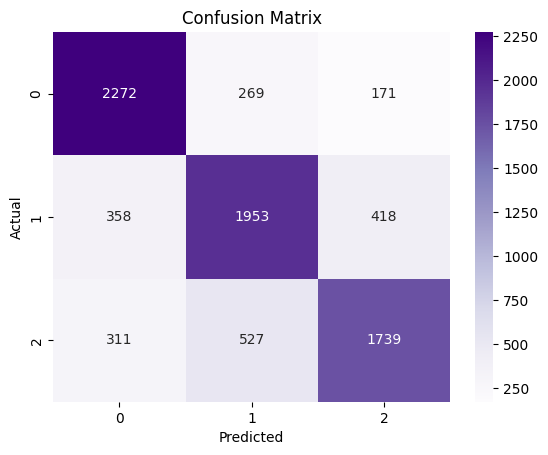

In [ ]:
dt = grid.best_estimator_
print("Decision Tree Results:")
dt_results = evaluate_model_performance(dt, X_test, y_test)

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": list(range(1, 31)),  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"] 
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)


Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=27)
Best params: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}
Best Score: 0.7738242879882417


K-Nearest Neighbors Results:
Accuracy: 0.7747567972062859
Precision: 0.7804976992713482
Recall: 0.7747567972062859
F1 Score: 0.772867751992398
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      2712
           1       0.78      0.71      0.74      2729
           2       0.83      0.71      0.77      2577

    accuracy                           0.77      8018
   macro avg       0.78      0.77      0.77      8018
weighted avg       0.78      0.77      0.77      8018



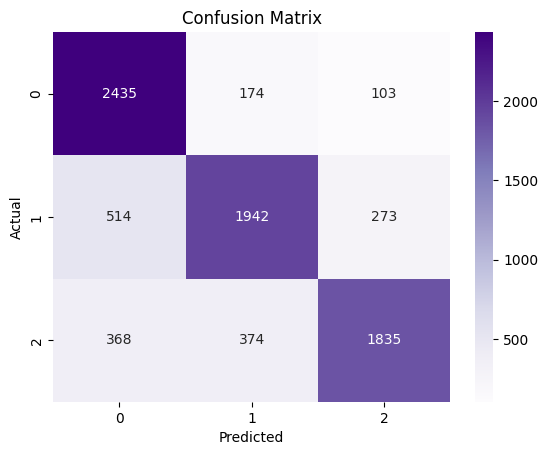

In [ ]:
# K-Nearest Neighbors
knn = grid.best_estimator_
knn.fit(X_train, y_train)
print("K-Nearest Neighbors Results:")
knn_results = evaluate_model_performance(knn, X_test, y_test)

# NAVIE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid = {
    "var_smoothing": np.logspace(-10, -1, 10) 
}

gnb = GaussianNB()

grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)

print('Best estimator:', grid.best_estimator_)
print('Best params:', grid.best_params_)
print('Best Score:', grid.best_score_)


Best estimator: GaussianNB(var_smoothing=1e-10)
Best params: {'var_smoothing': 1e-10}
Best Score: 0.6288824294796492


Naive Bayes Results:
Accuracy: 0.6265901721127464
Precision: 0.6304240926635213
Recall: 0.6265901721127464
F1 Score: 0.6231541653281523

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69      2712
           1       0.64      0.49      0.55      2729
           2       0.57      0.69      0.62      2577

    accuracy                           0.63      8018
   macro avg       0.63      0.63      0.62      8018
weighted avg       0.63      0.63      0.62      8018



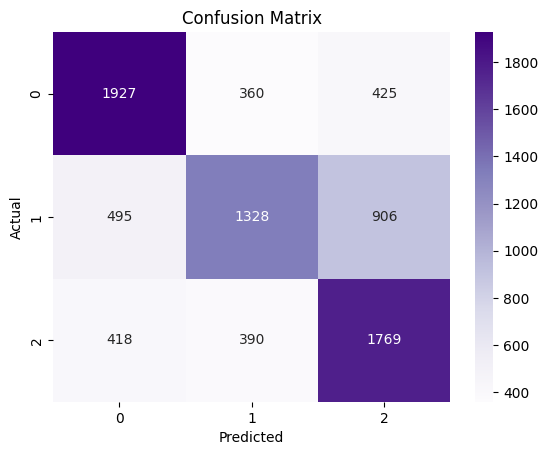

In [ ]:
# Naive Bayes
nb = grid.best_estimator_
nb.fit(X_train, y_train)
print("Naive Bayes Results:")
nb_results = evaluate_model_performance(nb, X_test, y_test)

# ARTIFICIAL NEURAL NETWORK

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


def one_layer_model(num_of_input_features, hidden_layer_nodes=20):
    """ 
    We wrap the model into a function for better usability.
    We make some of the important hyper-parameters, like the learning rate, 
    as arguments to the function. This way we can test different values for these
    hyperparameters without having to change the hard-coded model itself.
    """
    # create a simple model with ONE hidden layer only
    model = models.Sequential()
    # we create a hidden layer with 20 nodes. 
    # Here we can directly give it the input shape. Otherwise we can also create a separate input layer
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation='relu'))
    model.add(layers.Dense(7, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
    return model


clf = KerasClassifier(
    model=one_layer_model,
    loss="sparse_categorical_crossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= X_train.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,
    validation_split= 0.2,
    optimizer = "adam",
    optimizer__learning_rate = 0.001,
)

params = {
    'optimizer__learning_rate': [0.01, 0.001],
    'model__hidden_layer_nodes': [20,30,40],
}

gs = GridSearchCV(clf, params, scoring='balanced_accuracy', verbose=True)

gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.787423979808237 {'model__hidden_layer_nodes': 40, 'optimizer__learning_rate': 0.001}


Accuracy: 0.7849837864804191
Precision: 0.7895893709695874
Recall: 0.7849837864804191
F1 Score: 0.7831013514746691
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      2712
           1       0.79      0.72      0.76      2729
           2       0.83      0.72      0.77      2577

    accuracy                           0.78      8018
   macro avg       0.79      0.78      0.78      8018
weighted avg       0.79      0.78      0.78      8018



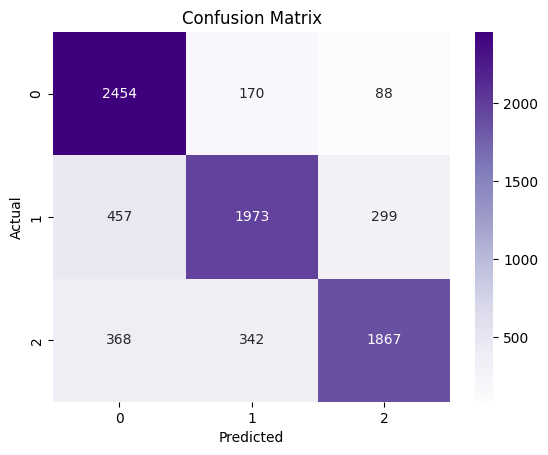

In [ ]:

# Check performance on test data
test_probabilities = gs.best_estimator_.predict(X_test)
# let's show the classification report with all the metrics
evaluate_model_performance(gs.best_estimator_, X_test, y_test)


# VISUALISING THE LEARNING CURVE 

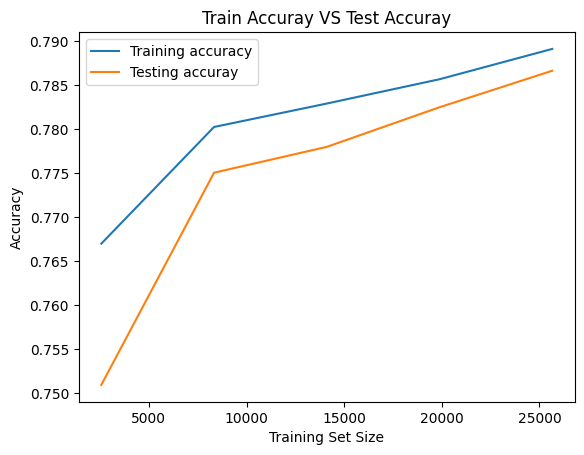

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gs.best_estimator_, X_train, y_train, cv=5, scoring='balanced_accuracy', n_jobs=-1)

plt.figure()

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing accuray')

plt.title('Train Accuray VS Test Accuray')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()